In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_boston
boston= load_boston()


In [3]:
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
boston.data.shape


(506, 13)

In [8]:
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [10]:
bos= pd.DataFrame(boston.data)
print(bos.head)

<bound method NDFrame.head of            0     1      2    3      4      5      6       7     8      9   \
0     0.00632  18.0   2.31  0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07  0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07  0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18  0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18  0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18  0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87  0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87  0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87  0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87  0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87  0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87  0.0  0.524  6.009 

In [11]:
bos.columns=boston.feature_names
bos.head


<bound method NDFrame.head of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  

In [12]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [15]:
bos['PRICE']= boston.target


In [17]:
from sklearn.linear_model import LinearRegression
X= bos.drop('PRICE', axis= 1)

lm=LinearRegression()
lm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
lm.fit(X,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.49110328036137


In [20]:
print('Number of Coefficients:', len(lm.coef_))

Number of Coefficients: 13


In [22]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns= ['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


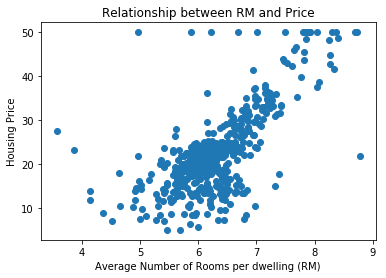

In [23]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Number of Rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

In [24]:
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

Text(0.5,1,'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$ ')

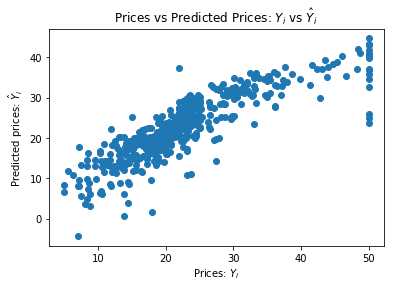

In [25]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$ ")


In [26]:
mseFull = np.mean((bos.PRICE)- lm.predict((X)) **2)
print(mseFull)

-547.7163314542489


In [27]:
lm= LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']]))** 2)
print(msePTRATIO)

62.652200013769274


In [36]:
#training and testing
import sklearn.model_selection
X_train,X_test,Y_train,Y_test= sklearn.model_selection.train_test_split(X, bos.PRICE, test_size= 0.33, random_state= 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(339, 13)
(167, 13)
(339,)
(167,)


In [38]:
l= LinearRegression()
lm.fit(X_train,Y_train)
pred_train= lm.predict(X_train)
pred_test = lm.predict(X_test)

In [39]:
print("Fitting a model X_train, then calculating MSE with Y_train")
np.mean((Y_train- lm.predict(X_train))** 2)

Fitting a model X_train, then calculating MSE with Y_train


19.546758473534666

In [40]:
print("Fitting a model X_train, then calculating MSE with X_test and Y_test")
np.mean((Y_test- lm.predict(X_test))** 2)

Fitting a model X_train, then calculating MSE with X_test and Y_test


28.541367275618313

Text(0,0.5,'Residuals')

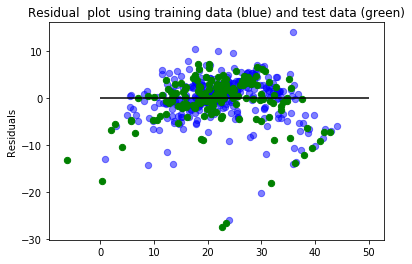

In [43]:
#residual plots using test and train data
plt.scatter(lm.predict(X_train), lm.predict(X_train)- Y_train, c= 'b',  s=40, alpha= 0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test)- Y_test, c= 'g',  s=40)
plt.hlines(y= 0, xmin=0, xmax= 50)
plt.title("Residual  plot  using training data (blue) and test data (green)")
plt.ylabel("Residuals")